In [ ]:
import sys
import os
import dlib
import glob
from skimage import io
import numpy as np
import cv2
#Download necessary dat file from this website:
#https://github.com/AKSHAYUBHAT/TensorFace/blob/master/openface/models/dlib/shape_predictor_68_face_landmarks.dat

In [ ]:
import cv2
import dlib
img = cv2.imread('iris.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale detector = dlib.get_frontal_face_detector()
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1) # rects contains all the faces detected

In [ ]:
def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

predictor_path = 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

for (i, rect) in enumerate(rects):
    print(i)
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)
    for (x, y) in shape:
        cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

0


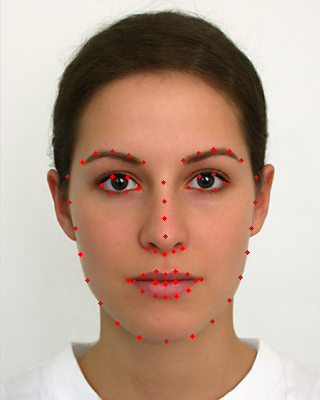

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
#age with the area between those points filled with that color.
def eye_on_mask(mask, side):
    points = [shape[i] for i in side]
    points = np.array(points, dtype=np.int32)
    mask = cv2.fillConvexPoly(mask, points, 255)  
    return mask
#left = [36, 37, 38, 39, 40, 41] # keypoint indices for left eye
#right = [42, 43, 44, 45, 46, 47] # keypoint indices for right eye
left = [ 37,38, 40, 41] # keypoint indices for left eye
right = [ 43,44, 46, 47] # keypoint indices for right eye
mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask = eye_on_mask(mask, left)
mask = eye_on_mask(mask, right)

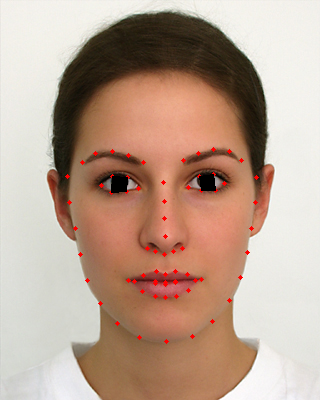

In [ ]:
res = cv2.bitwise_and(img,img,mask = ~mask)
cv2_imshow(res)